# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

/Users/saint/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [4]:
df = pd.read_csv("filled_autoscout.csv")

In [5]:
df.head()

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
0,Sedans,15770.000,VAT deductible,56013.000,66.000,Used,2.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.300,3.500,3.000
1,Sedans,14500.000,Price negotiable,80000.000,141.000,Used,1.000,0.000,Audi,A1,Red,Metallic,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,Unknown,5.600,7.100,4.700,2.000
2,Sedans,14640.000,VAT deductible,83450.000,85.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,4.000,4.000,Automatic,1598.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.400,3.400,3.000
3,Sedans,14500.000,VAT deductible,73000.000,66.000,Used,1.000,0.000,Audi,A1,Brown,Metallic,Cloth,3.000,4.000,Automatic,1422.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,Unknown,3.800,4.300,3.500,3.000
4,Sedans,16790.000,VAT deductible,16200.000,66.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1195.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Germany,4.100,4.600,3.800,3.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15919 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15919 non-null  float64
 14  nr_of_seats             15919 non-null

In [7]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    print("mean : ", round(df[col].mean(), 2))
    print("median : ", df[col].median())
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [8]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892   

## price_€

In [9]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





In [10]:
# Even if There is no extreme lower value in dataset, There are 4 tiny valuee for price_€ columns such as 13.0, 120.0, 255.0, 331.0


In [11]:
df.loc[df["price_€"] < 332.0,  ["price_€"]] = np.nan

In [12]:
df["price_€"].isnull().sum()

4

In [13]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(), 0)))

## km

In [14]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





In [15]:
df.iloc[df.km.sort_values(ascending=False).head(10).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9279,Sedans,8350.000,VAT deductible,317000.000,66.000,Used,1.000,0.000,Opel,Corsa,Red,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1199.000,front,Benzine,136.000,Euro 6d-TEMP,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,Unknown,5.974,7.400,5.100,2.000
3003,Sedans,14980.000,VAT deductible,291800.000,110.000,Used,1.000,0.000,Audi,A3,Blue,Metallic,Cloth,4.000,5.000,Manual,1968.000,4.000,1350.000,4WD,Diesel,125.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,Germany,4.700,5.600,4.100,3.000
5712,Station wagon,6000.000,VAT deductible,260000.000,100.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,Cloth,5.000,5.000,Automatic,1598.000,4.000,1425.000,front,Diesel,119.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,Germany,4.500,5.700,3.800,3.000
6224,Station wagon,9800.000,VAT deductible,248000.000,81.000,Used,1.000,0.000,Opel,Astra,White,Metallic,Cloth,4.000,4.000,Manual,1686.000,4.000,1523.000,front,Diesel,120.000,Euro 5,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.000,Unknown,4.500,5.400,3.948,3.000
15277,Van,14600.000,VAT deductible,240000.000,118.000,Used,1.000,0.000,Renault,Espace,White,Metallic,Part leather,5.000,5.000,Automatic,1598.000,4.000,1659.000,front,Diesel,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.000,Unknown,4.600,4.926,4.400,2.000
10804,Station wagon,10850.000,VAT deductible,232000.000,125.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,Cloth,4.000,5.000,Automatic,1956.000,4.000,1623.000,front,Diesel,146.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,5.500,7.700,4.200,3.000
6380,Station wagon,7990.000,VAT deductible,231879.000,118.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Cloth,4.000,5.000,Manual,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,On-board computer,Radio","Roof rack,Trailer hitch","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Unknown,3.652,3.900,3.500,3.000
6062,Station wagon,8980.000,VAT deductible,230928.000,100.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Full leather,4.000,5.000,Automatic,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Trailer hitch","ABS,Central door lock,Driver-side airbag,Fog l...",6.000,Unknown,4.522,5.700,3.800,3.000
6399,Station wagon,6990.000,VAT deductible,229500.000,100.000,Used,2.000,0.000,Opel,Astra,Black,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1518.000,front,Diesel,104.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Roof rack,Voice Control,Winter tyres","ABS,Central door lock,Central door lock with r...",6.000,Unknown,3.900,4.600,3.600,3.000
10495,Station wagon,9500.000,VAT deductible,222346.000,125.000,Used,1.000,0.000,Opel,Insignia,Silver

In [16]:
df.groupby("age")["km"].mean()

age
0.000    1328.472
1.000   17922.140
2.000   41525.294
3.000   77442.521
Name: km, dtype: float64

In [17]:
df.groupby("age")["km"].min()

age
0.000    0.000
1.000    1.000
2.000    1.000
3.000   10.000
Name: km, dtype: float64

In [18]:
df.groupby("age")["km"].max()

age
0.000   127022.000
1.000   136000.000
2.000   317000.000
3.000   291800.000
Name: km, dtype: float64

<AxesSubplot:xlabel='km'>

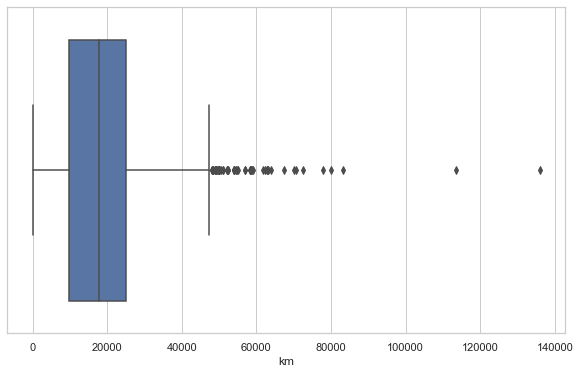

In [19]:
sns.boxplot(x=df[df["age"] == 1]["km"])

In [20]:
df[df["age"] == 1]["km"]

10      11300.000
16       9752.000
19      13406.000
23       9077.000
24       3000.000
           ...   
15789   15000.000
15790      50.000
15791   10803.000
15793       1.000
15795       1.000
Name: km, Length: 4525, dtype: float64

## hp_kW

In [21]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
mean :  88.37
median :  85.0
lower limit :  13.5
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





In [22]:
# the hp_kw values for opel corsa is min=33 max=155

In [23]:
df.loc[df["hp_kW"] > 200].sort_values(by="hp_kW", ascending=False)

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
3587,Sedans,64900.000,VAT deductible,35000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3590,Sedans,62900.000,VAT deductible,700.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,194.000,Euro 6d-TEMP,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,Unknown,8.300,11.300,6.600,0.000
3649,Compact,67600.000,VAT deductible,37747.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1485.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.000,Netherlands,8.300,11.300,6.600,2.000
3648,Sedans,74600.000,VAT deductible,13000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Full leather,4.000,5.000,Semi-automatic,2480.000,5.000,1490.000,4WD,Benzine,188.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",7.000,Netherlands,8.300,11.300,6.500,1.000
3610,Sedans,45890.000,VAT deductible,18700.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Italy,8.300,11.300,6.600,1.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3605,Sedans,51999.000,VAT deductible,33000.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,2.000
3604,Sedans,50000.000,VAT deductible,25000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,Unknown,8.300,11.300,6.600,1.000
3603,Sedans,52000.000,VAT deductible,13963.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Automatic clim...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sliding door,Sport package,Sport ...","Adaptive Cruise Control,Adaptive headlights,Al...",7.000,Unknown,8.300,11.300,6.600,1.000
3602,Sedans,51900.000,VAT deductible,49000.000,294.000,Used,1.000,1.000,Audi,A3,Silver

In [24]:
df.groupby(["make", "model","drive_chain"])["hp_kW"].median()

make     model     drive_chain
Audi     A1        4WD            85.000
                   front          70.000
         A2        front          85.000
         A3        4WD           135.000
                   front          85.000
Opel     Astra     4WD           100.000
                   front          92.000
         Corsa     front          66.000
         Insignia  4WD           154.000
                   front         121.000
                   rear          125.000
Renault  Clio      4WD           162.000
                   front          56.000
                   rear           55.000
         Duster    4WD            77.000
         Espace    4WD           118.000
                   front         118.000
Name: hp_kW, dtype: float64

In [25]:
df[df["hp_kW"]<51.0][["make", "model"]].value_counts()

make     model   
Opel     Corsa       9
         Astra       7
         Insignia    4
Renault  Clio        2
         Espace      2
Audi     A3          1
dtype: int64

In [26]:
df[df["hp_kW"] > 195][["make", "model"]].value_counts()

make  model   
Audi  A3          22
Opel  Insignia     1
dtype: int64

In [27]:
def detect_values(col, col2):
    my_list = df[col].unique()
    for i in my_list:
        a = df[df[col] == i][col2].max()
        b = df[df[col] == i][col2].min()
        c = df[df[col] == i][col2].mean()
        print(f"{i} max : {a}   min : {b}   mean : {c}")

In [28]:
df["hp_kW"] = df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x: x.fillna(x.median() if  x.median() > 1 else df["hp_kW"].median()))

In [29]:
df["hp_kW"] = df["hp_kW"].apply(lambda x: np.nan if x < 33 else x)

In [30]:
df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x: x.fillna(x.median() if  x.median() > 1 else df["hp_kW"].median())).isnull().sum()

0

In [31]:
df.isnull().sum()

body_type                  0
price_€                    0
vat                        0
km                         0
hp_kW                     22
type                       0
previous_owners            0
warranty                   0
make                       0
model                      0
body_color                 0
paint_type                 0
upholstery                 0
nr_of_doors                0
nr_of_seats                0
gearing_type               0
engine_displacement_cc     0
cylinders                  0
weight_kg                  0
drive_chain                0
fuel                       0
co2e_g                     0
emission_class             0
comfort&convenience        0
entertainment&media        0
extras                     0
safety&security            0
gears                      0
country_version            0
consumption_comb           0
consumption_city           0
consumption_country        0
age                        0
dtype: int64

In [32]:
detect_values("age", "previous_owners")

3.0 max : 4.0   min : 0.0   mean : 1.1115949918345127
2.0 max : 4.0   min : 0.0   mean : 1.0928053204353083
1.0 max : 2.0   min : 0.0   mean : 1.014364640883978
0.0 max : 2.0   min : 0.0   mean : 0.6321396192203083


In [33]:
get_diff_category_column(df.previous_owners)

{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}

## nr_of_doors

In [34]:
df["nr_of_doors"].value_counts(dropna=False)

5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64

In [35]:
df["nr_of_doors"].sort_values(ascending=False)

15202   7.000
0       5.000
10023   5.000
10012   5.000
10013   5.000
         ... 
688     2.000
691     2.000
699     2.000
9809    2.000
13782   1.000
Name: nr_of_doors, Length: 15919, dtype: float64

In [36]:
df.iloc[15202]

body_type                                                               Van
price_€                                                           21600.000
vat                                                        Price negotiable
km                                                                78000.000
hp_kW                                                               118.000
type                                                                   Used
previous_owners                                                       1.000
warranty                                                              0.000
make                                                                Renault
model                                                                Espace
body_color                                                            Brown
paint_type                                                         Metallic
upholstery                                                     Full leather
nr_of_doors 

In [37]:
df.iloc[13782]

body_type                                                           Compact
price_€                                                            8500.000
vat                                                          VAT deductible
km                                                                41493.000
hp_kW                                                                55.000
type                                                                   Used
previous_owners                                                       1.000
warranty                                                              1.000
make                                                                Renault
model                                                                  Clio
body_color                                                            White
paint_type                                                         Metallic
upholstery                                                            Cloth
nr_of_doors 

In [38]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

In [39]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()

make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [40]:
df[df["nr_of_seats"] == 2][["make", "model", "body_type"]].value_counts()

make     model     body_type    
Renault  Clio      Sedans           71
                   Transporter      29
                   Compact           8
Opel     Corsa     Transporter       4
Renault  Clio      Other             4
Opel     Corsa     Coupe             1
         Insignia  Station wagon     1
Renault  Clio      Van               1
dtype: int64

In [41]:
df.engine_displacement_cc.sort_values(ascending=False)

10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
           ...   
13904       1.000
12467       1.000
12473       1.000
12484       1.000
14314       1.000
Name: engine_displacement_cc, Length: 15919, dtype: float64

In [42]:
df.loc[(df.engine_displacement_cc > 3000), "engine_displacement_cc"] = df.engine_displacement_cc/10

In [43]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.000,Price negotiable,76500.000,88.000,Used,1.000,0.000,Opel,Insignia,Grey,Metallic,Full leather,5.000,5.000,Manual,1600.000,4.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.765,3.000
7169,Station wagon,18490.000,VAT deductible,22327.000,100.000,Employee's car,1.000,0.000,Opel,Astra,Green,Metallic,Cloth,5.000,5.000,Automatic,1589.800,4.000,1393.000,front,Benzine,119.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.800,1.000


In [44]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan

In [45]:
df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median()).isnull().sum()

0

In [46]:
df["engine_displacement_cc"]=df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median())

In [47]:
df.engine_displacement_cc.isnull().sum()

22

In [48]:
get_diff_category_column(df.engine_displacement_cc)

{0: '1000.0',
 1: '1100.0',
 2: '1149.0',
 3: '1195.0',
 4: '1197.0',
 5: '1198.0',
 6: '1199.0',
 7: '1200.0',
 8: '1229.0',
 9: '1239.0',
 10: '1248.0',
 11: '1300.0',
 12: '1333.0',
 13: '1350.0',
 14: '1364.0',
 15: '1368.0',
 16: '1369.0',
 17: '1390.0',
 18: '1395.0',
 19: '1396.0',
 20: '1397.0',
 21: '1398.0',
 22: '1399.0',
 23: '1400.0',
 24: '1422.0',
 25: '1461.0',
 26: '1490.0',
 27: '1495.0',
 28: '1496.0',
 29: '1498.0',
 30: '1499.0',
 31: '1500.0',
 32: '1533.0',
 33: '1568.0',
 34: '1580.0',
 35: '1584.0',
 36: '1589.8',
 37: '1596.0',
 38: '1598.0',
 39: '1599.0',
 40: '1600.0',
 41: '1618.0',
 42: '1686.0',
 43: '1696.0',
 44: '1798.0',
 45: '1800.0',
 46: '1856.0',
 47: '1896.0',
 48: '1956.0',
 49: '1968.0',
 50: '1984.0',
 51: '1995.0',
 52: '1997.0',
 53: '1998.0',
 54: '2000.0',
 55: '2480.0',
 56: '2967.0',
 57: '890.0',
 58: '898.0',
 59: '899.0',
 60: '900.0',
 61: '929.0',
 62: '973.0',
 63: '995.0',
 64: '996.0',
 65: '997.0',
 66: '998.0',
 67: '999.0'}

In [49]:
df.loc[df.engine_displacement_cc > 2500, "engine_displacement_cc" ] = 3.0
df.loc[df.engine_displacement_cc > 2000, "engine_displacement_cc" ] = 2.5
df.loc[df.engine_displacement_cc > 1800, "engine_displacement_cc" ] = 2.0
df.loc[df.engine_displacement_cc > 1600, "engine_displacement_cc" ] = 1.8
df.loc[df.engine_displacement_cc > 1500, "engine_displacement_cc" ] = 1.6
df.loc[df.engine_displacement_cc > 1400, "engine_displacement_cc" ] = 1.5
df.loc[df.engine_displacement_cc > 1300, "engine_displacement_cc" ] = 1.4
df.loc[df.engine_displacement_cc > 1200, "engine_displacement_cc" ] = 1.3
df.loc[df.engine_displacement_cc > 1100, "engine_displacement_cc" ] = 1.2
df.loc[df.engine_displacement_cc > 800, "engine_displacement_cc" ] = 1.0

In [50]:
df.engine_displacement_cc.value_counts()

1.600    5153
1.000    2990
1.400    2652
1.500    1950
2.000    1195
1.300     822
1.200     682
1.800     432
2.500      20
3.000       1
Name: engine_displacement_cc, dtype: int64

In [51]:
df.engine_displacement_cc = df.engine_displacement_cc *1000

In [52]:
df.cylinders.value_counts(ascending=True)

1.000        1
2.000        2
6.000        3
8.000        7
5.000       22
3.000     3325
4.000    12559
Name: cylinders, dtype: int64

In [53]:
df.cylinders.sort_values(ascending=True)

9956    1.000
15835   2.000
11342   2.000
0       3.000
2544    3.000
         ... 
535     8.000
15165   8.000
14989   8.000
15186   8.000
15151   8.000
Name: cylinders, Length: 15919, dtype: float64

In [54]:
df[(df.cylinders == 1) | (df.cylinders==2)]



,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9956,Compact,16625.000,VAT deductible,100.000,66.000,Pre-registered,1.000,0.000,Opel,Corsa,Black,Metallic,Cloth,3.000,5.000,Automatic,1400.000,1.000,1163.000,front,Benzine,140.000,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.000,Germany,6.002,7.800,4.900,0.000
11342,Station wagon,21900.000,VAT deductible,13600.000,100.000,Employee's car,1.000,0.000,Opel,Insignia,Grey,Metallic,Part leather,5.000,5.000,Automatic,1600.000,2.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.000,Italy,5.012,6.500,4.100,1.000
15835,Van,47590.000,VAT deductible,6000.000,147.000,Employee's car,1.000,0.000,Renault,Espace,Black,Metallic,Full leather,5.000,7.000,Automatic,2000.000,2.000,1840.000,front,Diesel,139.000,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.000,Germany,5.300,6.200,4.700,0.000


In [55]:
df.loc[(df.cylinders ==1)|(df.cylinders ==2), "cylinders"] = 4.0

In [56]:
df.iloc[9956]

body_type                                                           Compact
price_€                                                           16625.000
vat                                                          VAT deductible
km                                                                  100.000
hp_kW                                                                66.000
type                                                         Pre-registered
previous_owners                                                       1.000
warranty                                                              0.000
make                                                                   Opel
model                                                                 Corsa
body_color                                                            Black
paint_type                                                         Metallic
upholstery                                                            Cloth
nr_of_doors 

In [57]:
df.weight_kg.sort_values(ascending=True).head(50)

12779      1.000
8355       1.000
1143     102.000
8857     840.000
14313    900.000
13555    977.000
13513    977.000
13937    980.000
14105    980.000
13996    980.000
13935    980.000
14158    980.000
14479    980.000
13609    980.000
14233    980.000
14654    980.000
13999    980.000
13732    980.000
13541   1009.000
1203    1010.000
842     1010.000
874     1010.000
1425    1010.000
14116   1017.000
13897   1030.000
1869    1035.000
1255    1035.000
814     1035.000
1256    1035.000
2596    1035.000
1873    1035.000
1713    1035.000
1549    1035.000
1872    1035.000
1365    1035.000
1199    1035.000
2533    1040.000
134     1040.000
2670    1041.000
8292    1041.000
8397    1041.000
14482   1052.000
13562   1052.000
13738   1052.000
14269   1052.000
13973   1052.000
13958   1052.000
13522   1052.000
14823   1052.000
14348   1052.000
Name: weight_kg, dtype: float64

In [58]:
df.iloc[1143]

body_type                                                           Compact
price_€                                                           19229.000
vat                                                          VAT deductible
km                                                                 8263.000
hp_kW                                                                70.000
type                                                                   Used
previous_owners                                                       1.000
warranty                                                              1.000
make                                                                   Audi
model                                                                    A1
body_color                                                            Beige
paint_type                                                         Metallic
upholstery                                                            Cloth
nr_of_doors 

In [59]:
# df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan

In [60]:
df.loc[df.weight_kg < 103, "weight_kg"] = np.nan

In [61]:
df.weight_kg=df.groupby(["make", "model", "body_type"])["weight_kg"].apply(lambda x:x.fillna(x.mean()))

In [62]:
df.co2e_g.sort_values(ascending=True)

8110       14.000
3617       36.000
3615       36.000
3612       36.000
3356       36.000
           ...   
5818    12087.000
6578    12087.000
8542    12324.000
12343   13983.000
11888   14457.000
Name: co2e_g, Length: 15919, dtype: float64

In [63]:
# lower limit :  68.0
# upper limit :  164.0

<AxesSubplot:xlabel='co2e_g'>

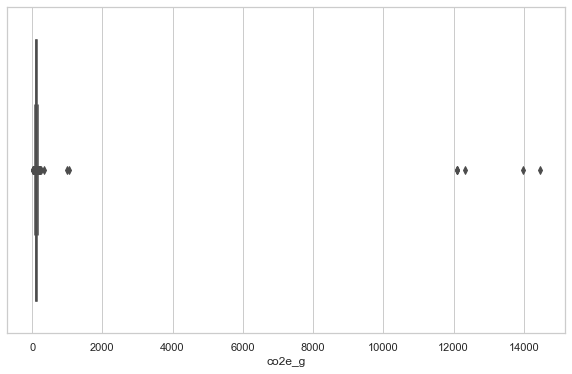

In [64]:
sns.boxplot(x=df["co2e_g"])

In [65]:
from scipy.stats.mstats import winsorize

In [66]:
Q1 = df.co2e_g.quantile(0.25)
Q3 = df.co2e_g.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [67]:
a = len(df.co2e_g[df.co2e_g < lower_limit])/len(df)
a

0.00043972611344933726

In [68]:
b = len(df.co2e_g[df.co2e_g>upper_limit])/len(df)
b

0.0155160500031409

In [69]:
winsorize(df.co2e_g, (a, b))

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [70]:
table_win = winsorize(df.co2e_g, (a,b))
table_win

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [71]:
table_win_ser = pd.Series(table_win)
table_win_ser

0        99.000
1       129.000
2        99.000
3        99.000
4       109.000
          ...  
15914   139.000
15915   164.000
15916   139.000
15917   139.000
15918   153.000
Length: 15919, dtype: float64

In [72]:
df.co2e_g = table_win_ser

In [73]:
df.co2e_g.sort_values(ascending=True)

3617     80.000
9798     80.000
12547    80.000
7857     80.000
8110     80.000
          ...  
12568   164.000
15704   164.000
10571   164.000
10562   164.000
12662   164.000
Name: co2e_g, Length: 15919, dtype: float64

In [74]:
df.gears.sort_values()

14375    1.000
8921     1.000
9812     2.000
15817    3.000
15845    3.000
         ...  
15812    9.000
15813    9.000
15814    9.000
15877    9.000
14495   50.000
Name: gears, Length: 15919, dtype: float64

In [75]:
df[df.gears < 4][["make", "model"]]

,make,model
8921,Opel,Corsa
9812,Opel,Corsa
14375,Renault,Clio
15817,Renault,Espace
15845,Renault,Espace
15846,Renault,Espace


In [76]:
df[df.gears == 9][["make", "model"]]

,make,model
15812,Renault,Espace
15813,Renault,Espace
15814,Renault,Espace
15824,Renault,Espace
15827,Renault,Espace
15828,Renault,Espace
15829,Renault,Espace
15830,Renault,Espace
15869,Renault,Espace
15876,Renault,Espace


In [77]:
df.loc[df.gears == 50, "gears"] = 5

In [78]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [79]:
df.gears= df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))

In [80]:
df.gears.sort_values()

7959    5.000
10288   5.000
10289   5.000
10290   5.000
10291   5.000
         ... 
15824   9.000
15827   9.000
15829   9.000
15869   9.000
15828   9.000
Name: gears, Length: 15919, dtype: float64

In [81]:
df.drop(["consumption_city", "consumption_country"], axis=1, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15897 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15919 non-null  float64
 14  nr_of_seats             15919 non-null

In [83]:
df.consumption_comb.sort_values()

13678    1.200
3615     1.600
3617     1.600
3612     1.600
8872     3.100
         ...  
12529    8.700
10817    8.700
10771    9.100
10513    9.714
535     13.800
Name: consumption_comb, Length: 15919, dtype: float64

<AxesSubplot:xlabel='consumption_comb'>

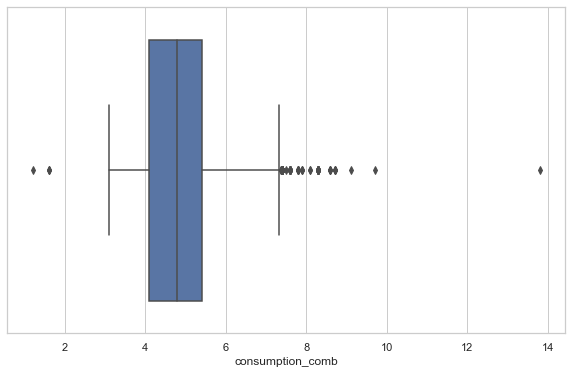

In [84]:
sns.boxplot(x=df["consumption_comb"])

In [85]:
df.iloc[535]

body_type                                                           Compact
price_€                                                           12990.000
vat                                                          VAT deductible
km                                                                41200.000
hp_kW                                                                70.000
type                                                                   Used
previous_owners                                                       1.000
warranty                                                              0.000
make                                                                   Audi
model                                                                    A1
body_color                                                           Silver
paint_type                                                         Metallic
upholstery                                                            Cloth
nr_of_doors 

In [86]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

make     model     body_type    
Audi     A1        Compact         4.400
                   Coupe           3.802
                   Other           4.800
                   Sedans          4.200
                   Station wagon   4.200
                   Van             5.074
         A2        Off-Road        4.900
         A3        Compact         4.100
                   Convertible     4.800
                   Coupe           3.900
                   Other           4.150
                   Sedans          4.032
                   Station wagon   4.500
Opel     Astra     Compact         4.300
                   Coupe           6.200
                   Off-Road        5.600
                   Other           4.294
                   Sedans          4.800
                   Station wagon   4.500
         Corsa     Compact         5.600
                   Coupe           5.300
                   Off-Road        5.200
                   Other           5.200
                   Sedan

In [87]:
df.consumption_comb.iloc[[13678]] = 3.35

In [88]:
df.consumption_comb.iloc[[535]] = 4.400

In [89]:
df.loc[535]

body_type                                                           Compact
price_€                                                           12990.000
vat                                                          VAT deductible
km                                                                41200.000
hp_kW                                                                70.000
type                                                                   Used
previous_owners                                                       1.000
warranty                                                              0.000
make                                                                   Audi
model                                                                    A1
body_color                                                           Silver
paint_type                                                         Metallic
upholstery                                                            Cloth
nr_of_doors 

In [90]:
df.age.sort_values(ascending=True)

7959   0.000
7936   0.000
7935   0.000
7934   0.000
7933   0.000
        ... 
6119   3.000
6118   3.000
6117   3.000
6133   3.000
0      3.000
Name: age, Length: 15919, dtype: float64

<AxesSubplot:>

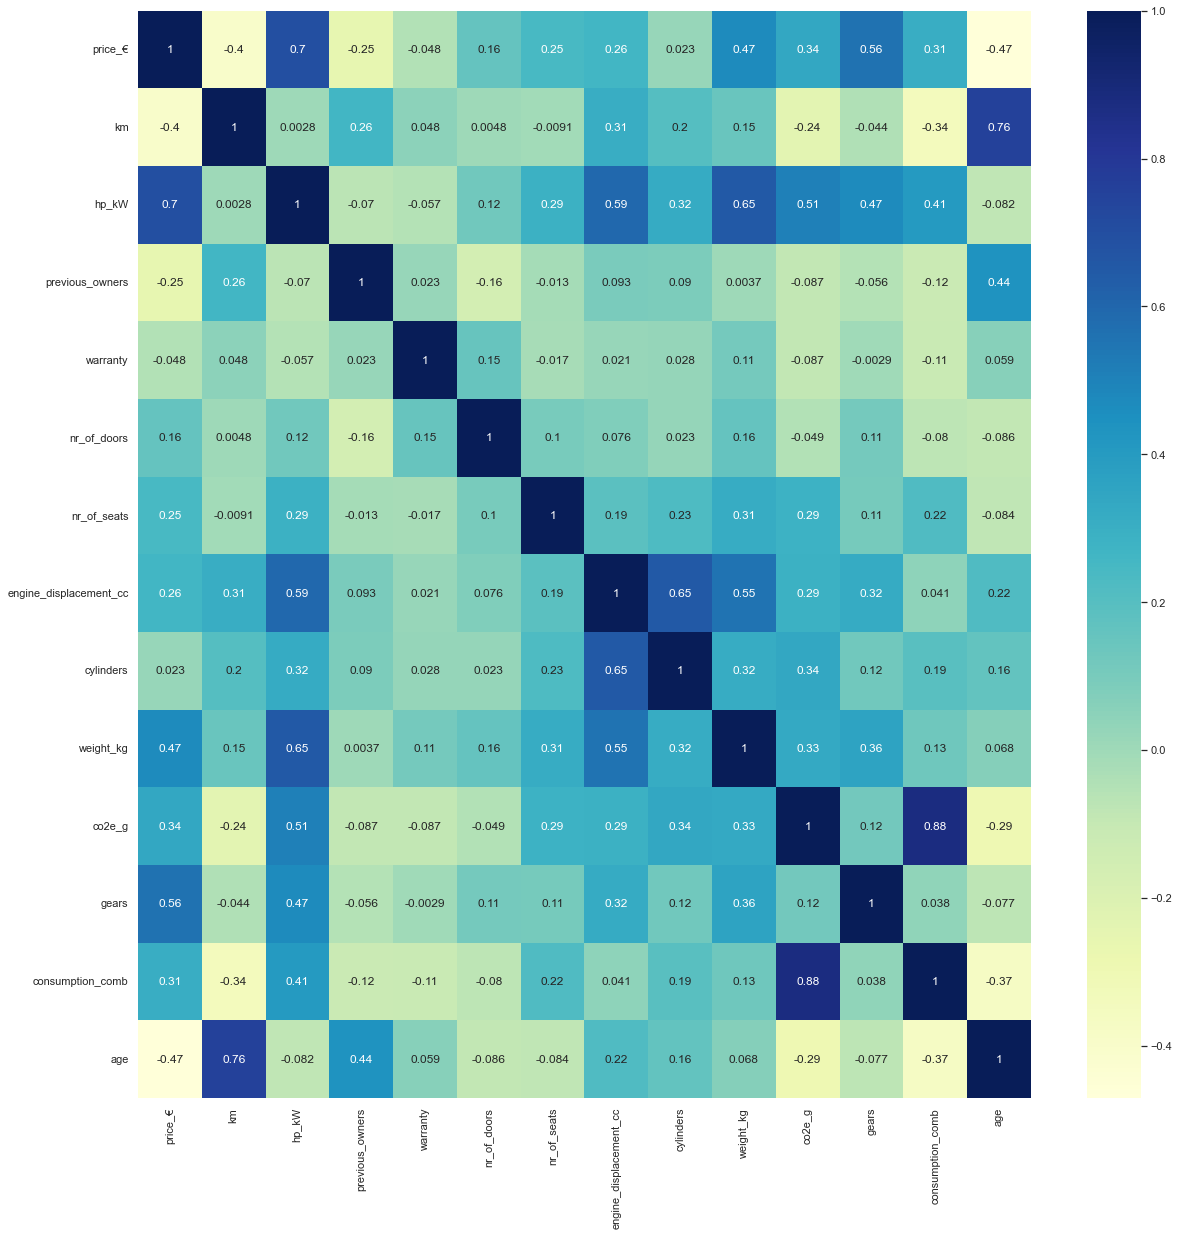

In [91]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)



In [92]:
pd.set_option('display.max_rows', 160)

In [93]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''' "!?|.,*+-_/][''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [94]:
col_o = ['body_type','vat','type', 'previous_owners',
       'warranty', 'make', 'model', 'body_color', 'paint_type', 'upholstery',
       'gearing_type',
       'drive_chain', 'fuel',
       'emission_class', 'comfort&convenience', 'entertainment&media',
       'extras', 'safety&security', 'country_version']

In [95]:

def control_outlier(col) :
    print("column name : ",col)
    print("--"*20)
    print(get_diff_category_column(df[col]))
    print("**"*40)
    
    print("\n\n")

In [96]:
for i in col_o:
    control_outlier(i)

column name :  body_type
----------------------------------------
{0: 'Compact', 1: 'Convertible', 2: 'Coupe', 3: 'Off-Road', 4: 'Other', 5: 'Sedans', 6: 'Station wagon', 7: 'Transporter', 8: 'Van'}
********************************************************************************



column name :  vat
----------------------------------------
{0: 'Price negotiable', 1: 'VAT deductible'}
********************************************************************************



column name :  type
----------------------------------------
{0: 'Demonstration', 1: "Employee's car", 2: 'New', 3: 'Pre-registered', 4: 'Used'}
********************************************************************************



column name :  previous_owners
----------------------------------------
{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}
********************************************************************************



column name :  warranty
----------------------------------------
{0: '0.0', 1: '1.0'}
******

In [98]:
df.to_csv("withoutoutliers_autoscout.csv", index=False)